First step is uploading my csv file


1. Load the dataset into a Pandas DataFrame and display the first 5 rows.
 Explain what each column means in your own words.

In [1]:
import pandas as pd

In [2]:
df= pd.read_csv(r"car dataset.csv")
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


1st column reffers to the specific name of the Car, the second name reffers to the year that the car was manufactured, the third column reffers to the price that the car will be sold for, the forth column reffers to how many kilometers the specific vehicle has accumulated since it was manufactured, the fifth column reffers to the type of fuel consumed ny the specific vehicle, the sixth column reffers to what entity is selling the vehicle, be it an individual or a company, the seventh column represents whether the vehicle is automatic or manual transmission, the eigth column shows how many owners the vehicle has gone through, the ninth column represents how many mileage the vehicle has accumulated in kilometer per litre per kg, the 10th column represents the engine power, the 11th column represents the maximum power of the engine and finally the 12th column represents the number of seats in the specific vehicle.

2. Check for missing values in the dataset.
 Show both the number of missing values per column and the percentage.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  7907 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


In [4]:
missing_count = df.isnull().sum()
missing_percentage = (df.isnull().sum()/len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing Percentage': missing_percentage
})
print(missing_summary)

                    Missing Count  Missing Percentage
name                            0            0.000000
year                            0            0.000000
selling_price                   0            0.000000
km_driven                       0            0.000000
fuel                            0            0.000000
seller_type                     0            0.000000
transmission                    0            0.000000
owner                           0            0.000000
mileage(km/ltr/kg)            221            2.718996
engine                        221            2.718996
max_power                     215            2.645177
seats                         221            2.718996


3. Drop any rows where the target variable (selling price) is missing.
 Explain why we can’t train a model with missing target values.


In [5]:
#There are no rows where the target variable which is the selling price in this case is missing.
# the code to drop empty rows is
# df.dropna() drops every row with an empty value

models cannot be trained with missing target values, since the models learn by establishing a clear relationship between the feature values and target values, with the target value missing the model will lack the necessary true value to compare its predicted value to inorder to find the error hence know where to optimize.
with the feature value missing the model cannot calculate the error. hence cannot optimize to correct the error.

4. Fill missing values in the “mileage” column with the column’s mean.
 Explain why filling missing values can sometimes be better than dropping rows.


In [6]:
mean_mileage = df['mileage(km/ltr/kg)'].mean()
df['mileage(km/ltr/kg)'] = df['mileage(km/ltr/kg)'].fillna(mean_mileage)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                8128 non-null   object 
 1   year                8128 non-null   int64  
 2   selling_price       8128 non-null   int64  
 3   km_driven           8128 non-null   int64  
 4   fuel                8128 non-null   object 
 5   seller_type         8128 non-null   object 
 6   transmission        8128 non-null   object 
 7   owner               8128 non-null   object 
 8   mileage(km/ltr/kg)  8128 non-null   float64
 9   engine              7907 non-null   float64
 10  max_power           7913 non-null   object 
 11  seats               7907 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 762.1+ KB


replacing missing values is often better than dropping rows due to the fact that everytime you drop a row, the statistical power drops hence replacing the missing values maintains the statistical power.
also dropping entire rows will contribute to creation of bias due to omission of certain observations that could have been very crucial

5. Remove duplicate rows from the dataset.
 Explain how duplicate rows can affect model training.


In [8]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6926 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6926 non-null   object 
 1   year                6926 non-null   int64  
 2   selling_price       6926 non-null   int64  
 3   km_driven           6926 non-null   int64  
 4   fuel                6926 non-null   object 
 5   seller_type         6926 non-null   object 
 6   transmission        6926 non-null   object 
 7   owner               6926 non-null   object 
 8   mileage(km/ltr/kg)  6926 non-null   float64
 9   engine              6718 non-null   float64
 10  max_power           6721 non-null   object 
 11  seats               6718 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 703.4+ KB


Duplicate rows lead to model overfitting,
also lead to false confidence when testing the data for accuracy.

6. Convert the “year” column into the car’s age.
 Example: If the car’s year is 2015 and the current year is 2025, the age is 10 years.


In [9]:
from datetime import datetime
current_year = datetime.now().year

df['year'] = current_year - df['year']
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


7. Check the unique values in the “fuel type” column.
 Explain why knowing all possible values in a categorical column is important before encoding.

In [10]:
df.nunique(axis = 0, dropna = True)

name                  2058
year                    29
selling_price          677
km_driven              921
fuel                     4
seller_type              3
transmission             2
owner                    5
mileage(km/ltr/kg)     382
engine                 121
max_power              320
seats                    9
dtype: int64

Knowing all possible values aids in model consistency and prediction reliability. Also, it helps in preventing data leakage where the info from testing set influences the training process

8. Replace inconsistent values in the “transmission” column.
 For example, replace “manual” and “Manual” with “Manual” (consistent casing).


In [11]:
unique_value = df['transmission'].unique()
print(unique_value)

['Manual' 'Automatic']


In [12]:
# replacing values in some certain column
df['transmission'] = df['transmission'].replace('manual', 'Manual')
df['transmission'] = df['transmission'].replace('automatic', 'Automatic')

Check if there are any outliers in the “selling price” column using a boxplot.
 Explain why outliers can affect model accuracy.


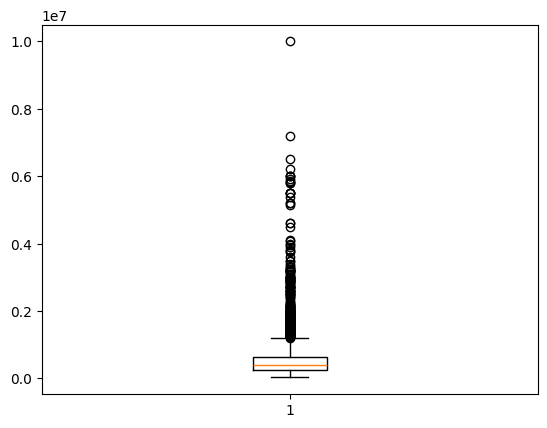

In [13]:
import matplotlib.pyplot as plt
plt.boxplot(df['selling_price'])
plt.show()

Algorithms like logic regression and linear regression try to reduce the average error by fitting to the data. Outliers can drastically shift the fitted line/ boundary hence reducing model accuracy significantly.

10. Remove cars that are priced below 10,000 or above 5,000,000 (possible outliers).
 Explain why setting realistic price limits can help improve model performance.


In [14]:
df = df.loc[(df['selling_price'] >= 20000) & (df['selling_price'] <= 5000000)]
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   name                6906 non-null   object 
 1   year                6906 non-null   int64  
 2   selling_price       6906 non-null   int64  
 3   km_driven           6906 non-null   int64  
 4   fuel                6906 non-null   object 
 5   seller_type         6906 non-null   object 
 6   transmission        6906 non-null   object 
 7   owner               6906 non-null   object 
 8   mileage(km/ltr/kg)  6906 non-null   float64
 9   engine              6698 non-null   float64
 10  max_power           6701 non-null   object 
 11  seats               6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


reason for setting realistic price limits
distribution normalization - outliers significantly skew data hence hard for the mode to learn. Removing them ensures the data is well normalized hence the learning algorithms learn better.
Variance reduction - outliers increase variance making it harder for model to establish consistent pattern.

11. Standardize the column names so they are all lowercase and contain underscores instead of spaces.


In [17]:
df = df.rename(columns= {'name': 'name', 'year': 'year', 'selling_price' : 'selling_price', 'km_driven' : 'km_driven', 'fuel' : 'fuel', 'seller_type' : 'seller_type', 'transmission' : 'transmission', 'owner' : 'owner', 'mileage(km/ltr/kg)' : 'mileage', 'engine' : 'engine', 'max_power' : 'max_power', 'seats' : 'seats'})
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


12. Check if any numerical columns are stored as strings and convert them to numbers.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6701 non-null   object 
 11  seats          6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


In [23]:
# converting max_power from an object to an integer
# mean_max_power = df['max_power'].mean()
df['max_power'] = df['max_power'].fillna('null')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6906 non-null   object 
 11  seats          6698 non-null   float64
dtypes: float64(3), int64(3), object(6)
memory usage: 701.4+ KB


In [28]:

df['max_power'] = df['max_power'].astype(str).str.strip()  #remove leading/trailing spaces
df['max_power'] = df['max_power'].replace(['null', '', 'NULL', 'Null', 'nan'], 0)
df['max_power'] = pd.to_numeric(df['max_power'], errors='coerce').fillna(0)

In [29]:
df['max_power'] = df['max_power'].astype(float)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6906 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           6906 non-null   object 
 1   year           6906 non-null   int64  
 2   selling_price  6906 non-null   int64  
 3   km_driven      6906 non-null   int64  
 4   fuel           6906 non-null   object 
 5   seller_type    6906 non-null   object 
 6   transmission   6906 non-null   object 
 7   owner          6906 non-null   object 
 8   mileage        6906 non-null   float64
 9   engine         6698 non-null   float64
 10  max_power      6906 non-null   float64
 11  seats          6698 non-null   float64
dtypes: float64(4), int64(3), object(5)
memory usage: 701.4+ KB


13. Create a new column for “price per kilometer” by dividing the selling price by the mileage.


In [32]:
df['price_per_kg'] = df.apply(
    lambda row: 0 if row['mileage'] == 0 else row['selling_price'] / row['mileage'],
    axis=1
)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230.769231
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502.365184
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926.553672
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782.608696
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074.534161


In [34]:
# remove the decimals in price per kg.
df['price_per_kg'] = df['price_per_kg'].astype(int)
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


14. Ensure the dataset index is properly reset after cleaning.

In [35]:
df = df.reset_index()
df.head()

,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats,price_per_kg
0,0,Maruti Swift Dzire VDI,11,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0,19230
1,1,Skoda Rapid 1.5 TDI Ambition,11,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0,17502
2,2,Honda City 2017-2020 EXi,19,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,5.0,8926
3,3,Hyundai i20 Sportz Diesel,15,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0,9782
4,4,Maruti Swift VXI BSIII,18,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0,8074


Save your cleaned dataset as a new CSV file called cleaned_cars.csv.

In [36]:
df.to_csv('cleaned_cars.csv', index=False)